## Step 1. Import and examine data

In [1]:
import pandas as pd
data = pd.read_csv('datasets/data.csv')
from pymystem3 import Mystem
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import matplotlib.pyplot as plt

In [2]:
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [4]:
data['debt'].value_counts()

0    19784
1     1741
Name: debt, dtype: int64

In [5]:
data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


**Conclusion**

1. The data type seems to be correct everywhere
2. days_employed - big spread and negative values
3. Education, Purpose - non-standardized
4. Family_status, Income_type - probably not standardized
5. Some data on days_employed and total_income are missing
6. All records have information about the debt payment delays 
7. Columns do not need to be renamed

## Step 2. Data preprocessing

### Processing missing values

#### Children

In [6]:
print(data['children'].value_counts())

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64


In [7]:
print(data[data['children'] == 20]['children'].count())
print(data[data['children'] == 20]['debt'].sum())
print(data[data['children'] == 20]['debt'].sum()/data[data['children'] == 20]['children'].count())

76
8
0.10526315789473684


In [8]:
print(data[data['children'] == -1]['children'].count())
print(data[data['children'] == -1]['debt'].sum())
print(data[data['children'] == -1]['debt'].sum()/data[data['children'] == -1]['children'].count())

47
1
0.02127659574468085


Since the number of children 20 and -1 is clearly unrealistic + their total number is small, it is better to exclude them

In [9]:
data = data[data['children'] != 20]
data = data[data['children'] != -1]
print(data['children'].value_counts())

0    14149
1     4818
2     2055
3      330
4       41
5        9
Name: children, dtype: int64


#### Education

In [10]:
data['education'] = data['education'].str.lower()
print(data['education'].value_counts())
print(data['education_id'].value_counts())


среднее                15136
высшее                  5237
неоконченное высшее      741
начальное                282
ученая степень             6
Name: education, dtype: int64
1    15136
0     5237
2      741
3      282
4        6
Name: education_id, dtype: int64


#### Family status

In [11]:
print(data['family_status'].value_counts())
print(data['family_status_id'].value_counts())

женат / замужем          12302
гражданский брак          4160
Не женат / не замужем     2799
в разводе                 1189
вдовец / вдова             952
Name: family_status, dtype: int64
0    12302
1     4160
4     2799
3     1189
2      952
Name: family_status_id, dtype: int64


#### Gender

In [12]:
print(data['gender'].value_counts())
data = data[data['gender'] != 'XNA']
print(data['gender'].value_counts())

F      14154
M       7247
XNA        1
Name: gender, dtype: int64
F    14154
M     7247
Name: gender, dtype: int64


#### Income types

We can drop types that are rare

In [13]:
print(data['income_type'].value_counts())
#print(data[data['debt'] == 1]['income_type'].value_counts())
data = data[(data['income_type'] != 'предприниматель') & (data['income_type'] != 'безработный')& (data['income_type'] != 'студент')& (data['income_type'] != 'в декрете')]
print(data['income_type'].value_counts())


сотрудник          11050
компаньон           5053
пенсионер           3839
госслужащий         1453
безработный            2
предприниматель        2
студент                1
в декрете              1
Name: income_type, dtype: int64
сотрудник      11050
компаньон       5053
пенсионер       3839
госслужащий     1453
Name: income_type, dtype: int64


#### Loan purpose

In [14]:
print(data['purpose'].value_counts())

свадьба                                   796
на проведение свадьбы                     771
сыграть свадьбу                           769
операции с недвижимостью                  673
покупка коммерческой недвижимости         661
покупка жилья для сдачи                   650
операции с жильем                         648
операции с коммерческой недвижимостью     646
жилье                                     642
покупка жилья                             641
покупка жилья для семьи                   640
недвижимость                              632
строительство собственной недвижимости    627
операции со своей недвижимостью           626
строительство жилой недвижимости          622
строительство недвижимости                620
покупка своего жилья                      619
покупка недвижимости                      618
ремонт жилью                              608
покупка жилой недвижимости                602
на покупку своего автомобиля              504
заняться высшим образованием      

#### Age

We can drop data where age is 0 (100 obs)

In [15]:
print(data['dob_years'].value_counts())
data = data[data['dob_years'] != 0]
print(data['dob_years'].unique())


35    614
40    603
41    603
34    597
38    595
42    592
33    577
39    571
31    555
36    553
44    543
29    543
30    536
48    536
37    531
43    510
50    509
32    506
49    505
28    501
45    493
27    489
52    483
56    482
47    480
54    476
46    469
58    460
57    457
53    457
51    446
59    441
55    441
26    406
60    376
25    356
61    353
62    351
63    268
64    263
24    262
23    252
65    194
66    183
22    182
67    167
21    110
0     100
68     99
69     83
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64
[42 36 33 32 53 27 43 50 35 41 40 65 54 56 26 48 24 21 57 67 28 63 62 47
 34 68 25 31 30 20 49 37 45 61 64 44 52 46 23 38 39 51 59 29 60 55 58 71
 22 73 66 69 19 72 70 74 75]


#### days_employed + total_income

In [16]:
data[data['days_employed'].isnull()==True].head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
65,0,NaN,21,среднее,1,Не женат / не замужем,4,M,компаньон,0,NaN,операции с коммерческой недвижимостью
67,0,NaN,52,высшее,0,женат / замужем,0,F,пенсионер,0,NaN,покупка жилья для семьи
72,1,NaN,32,высшее,0,женат / замужем,0,M,госслужащий,0,NaN,операции с коммерческой недвижимостью
82,2,NaN,50,высшее,0,женат / замужем,0,F,сотрудник,0,NaN,жилье
83,0,NaN,52,среднее,1,женат / замужем,0,M,сотрудник,0,NaN,жилье


In [17]:
data[data['days_employed'].isnull() == True].count()

children            2151
days_employed          0
dob_years           2151
education           2151
education_id        2151
family_status       2151
family_status_id    2151
gender              2151
income_type         2151
debt                2151
total_income           0
purpose             2151
dtype: int64

Those records that don't have days_employed don't have total_income either

In [18]:
data[(data['days_employed'].isnull() == True) & data['total_income'].isnull() == True].count()


children            2151
days_employed          0
dob_years           2151
education           2151
education_id        2151
family_status       2151
family_status_id    2151
gender              2151
income_type         2151
debt                2151
total_income           0
purpose             2151
dtype: int64

In [19]:
print(data['days_employed'].corr(data['dob_years'], method='pearson' ))


0.6021116197799463


Overall employment lenght is highly correlated with age (which is logical)

Can we understand why the seniority is negative and is it possible to fill gaps with the help of age?

<AxesSubplot:xlabel='days_employed', ylabel='dob_years'>

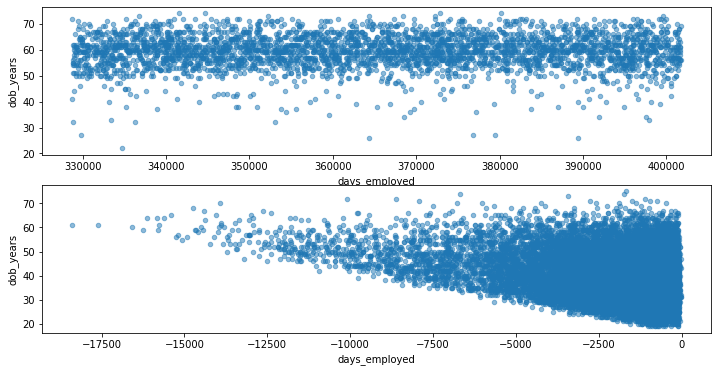

In [20]:
fig, axes = plt.subplots(2, facecolor='white', figsize=(12, 6))

data[data['days_employed']>0].plot.scatter(x="days_employed", y="dob_years", alpha=0.5, ax=axes[0])
data[data['days_employed']<0].plot.scatter(x="days_employed", y="dob_years", alpha=0.5, ax=axes[1])


The experience is positive mainly for 50+. 

There is a logic for the negative values of days_employed - the absolute value increases with the person age


In [21]:
print(data[data['days_employed']>0]['income_type'].value_counts())
print()
print(data[data['days_employed']<0]['income_type'].value_counts())



пенсионер    3412
Name: income_type, dtype: int64

сотрудник      9900
компаньон      4531
госслужащий    1301
Name: income_type, dtype: int64


days_employed is positive only if income_type = retired

I guess that's the reason why days_employed behave differently

In [22]:
print(data['days_employed'].head())
data.loc[data['days_employed']<0, 'days_employed'] = -1 * data['days_employed']
print(data['days_employed'].head())

0     -8437.673028
1     -4024.803754
2     -5623.422610
3     -4124.747207
4    340266.072047
Name: days_employed, dtype: float64
0      8437.673028
1      4024.803754
2      5623.422610
3      4124.747207
4    340266.072047
Name: days_employed, dtype: float64


<AxesSubplot:xlabel='days_employed', ylabel='dob_years'>

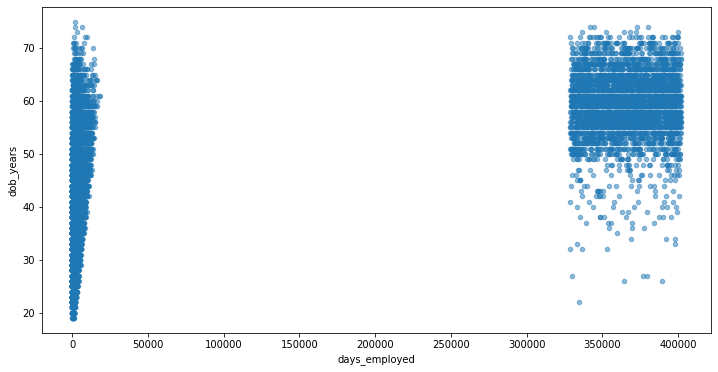

In [23]:
fig, axes = plt.subplots(facecolor='white', figsize=(12, 6))

data[data['days_employed']>0].plot.scatter(x="days_employed", y="dob_years", alpha=0.5, ax=axes)


There are still big differences between the non-working and working population

<AxesSubplot:xlabel='years_employed', ylabel='dob_years'>

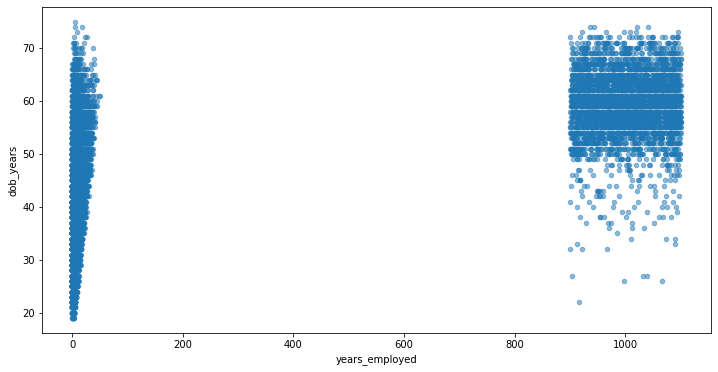

In [24]:
fig, axes = plt.subplots(facecolor='white', figsize=(12, 6))

data['years_employed'] = data['days_employed']/365
data.plot.scatter(x="years_employed", y="dob_years", alpha=0.5, ax=axes)


2 options, either the data means something else for retieries, or maybe the data in hours for some reason? Let's check option 2

<AxesSubplot:xlabel='years_employed', ylabel='dob_years'>

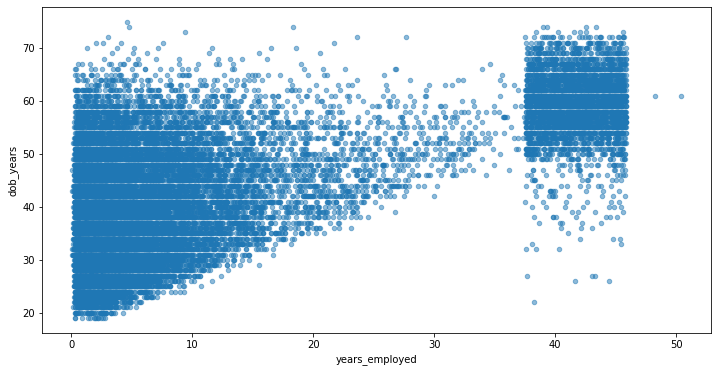

In [25]:
fig, axes = plt.subplots(facecolor='white', figsize=(12, 6))

data.loc[data['income_type'] == 'пенсионер', 'years_employed'] =  data['years_employed']/24
data.plot.scatter(x="years_employed", y="dob_years", alpha=0.5, ax=axes)


In [26]:
print(data[data['years_employed'] > data['dob_years'] - 13]['dob_years'].count())
print(data[(data['years_employed'] > data['dob_years'] - 13) & 
           (data['income_type'] == 'пенсионер')]['dob_years'].count())


724
716


700+ pensioners have such a long work experience that they started working before the age of 13? Maybe this is some job, where years of work experience are multiplied by coeeficient (for example in army, firefighters, etc)

At the same time, 51 pensioners have more work experience than their age.

Also, the graph continues to show the gap between pensioners and workers. Also strange is situations where people are working at the age of 70+ years old but have less than 5 years of experience

137192.0183935626

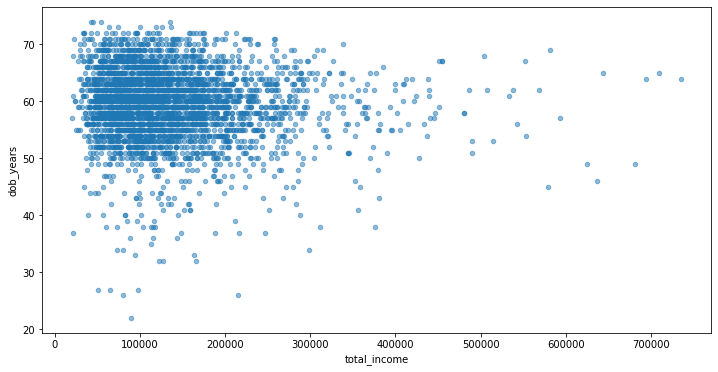

In [27]:
fig, axes = plt.subplots(facecolor='white', figsize=(12, 6))

data[data['income_type'] == 'пенсионер'].plot.scatter(x="total_income", y="dob_years", alpha=0.5, ax=axes)
data[data['income_type'] == 'пенсионер']['total_income'].mean()

<AxesSubplot:xlabel='total_income', ylabel='dob_years'>

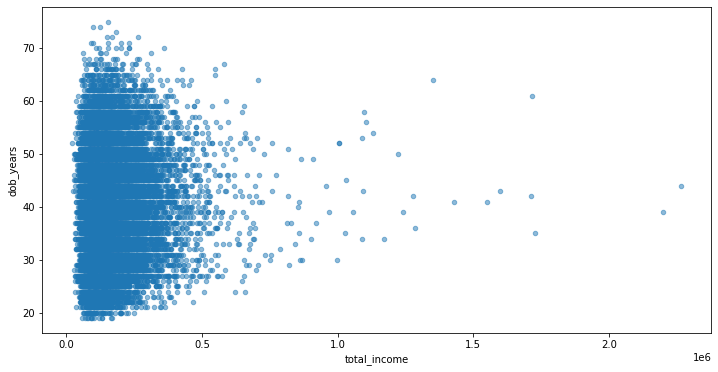

In [28]:
fig, axes = plt.subplots(facecolor='white', figsize=(12, 6))

data[data['income_type'] != 'пенсионер'].plot.scatter(x="total_income", y="dob_years", alpha=0.5, ax=axes)

I  decided to fill in the missing values for "days_employed" and "total_income" by age + by type of employment. The last one is important primarily for income. 

For days_employed, it allows you to take into account the "strangeness" of calculating it for retieries and take mean value for the outliers

In [29]:
data[data['income_type'] == 'пенсионер']['dob_years'].unique()

array([53, 65, 57, 67, 63, 62, 68, 54, 64, 52, 61, 59, 60, 71, 38, 58, 55,
       73, 66, 56, 44, 69, 51, 49, 46, 50, 41, 48, 42, 72, 22, 37, 70, 39,
       45, 47, 74, 43, 40, 24, 34, 33, 36, 32, 35, 27, 26, 31],
      dtype=int64)

In [30]:
all_jobs = data['income_type'].unique()
age_job_mediandays = {}
age_job_medianinc = {}
for job in all_jobs:
    print(job)
    all_ages = data[data['income_type'] == job]['dob_years'].unique()
    days_dict = {}
    inc_dict = {}
    for age in all_ages:
        res = data[(age-2 < data['dob_years']) & (data['dob_years'] < age+2) & 
                   (data['income_type'] == job) ]['days_employed'].median()
        res2 = data[(age-2 < data['dob_years']) & (data['dob_years'] < age+2) & 
                    (data['income_type'] == job) ]['total_income'].median()
        days_dict[age] = res
        inc_dict[age] = res2
    age_job_mediandays[job] = days_dict
    age_job_medianinc[job] = inc_dict
    
         

сотрудник
пенсионер
компаньон
госслужащий


In [31]:
for job in all_jobs:
    all_ages = data[data['income_type'] == job]['dob_years'].unique()
    for age in all_ages:
        data.loc[(data['dob_years'] == age) & (data['income_type'] == job) &
                 (data['days_employed'].isnull() == True), 'days_employed'] = age_job_mediandays[job][age]
        data.loc[(data['dob_years'] == age) & (data['income_type'] == job) &
                 (data['total_income'].isnull() == True), 'total_income'] = age_job_medianinc[job][age]
    

In [32]:
data['years_employed'] = data['days_employed']/365
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21295 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21295 non-null  int64  
 1   days_employed     21294 non-null  float64
 2   dob_years         21295 non-null  int64  
 3   education         21295 non-null  object 
 4   education_id      21295 non-null  int64  
 5   family_status     21295 non-null  object 
 6   family_status_id  21295 non-null  int64  
 7   gender            21295 non-null  object 
 8   income_type       21295 non-null  object 
 9   debt              21295 non-null  int64  
 10  total_income      21294 non-null  float64
 11  purpose           21295 non-null  object 
 12  years_employed    21294 non-null  float64
dtypes: float64(3), int64(5), object(5)
memory usage: 2.8+ MB


In [33]:
data[data['days_employed'].isnull() == True] 

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
3619,0,NaN,24,среднее,1,женат / замужем,0,F,пенсионер,0,NaN,покупка своего жилья,NaN


In [34]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21294 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21294 non-null  int64  
 1   days_employed     21294 non-null  float64
 2   dob_years         21294 non-null  int64  
 3   education         21294 non-null  object 
 4   education_id      21294 non-null  int64  
 5   family_status     21294 non-null  object 
 6   family_status_id  21294 non-null  int64  
 7   gender            21294 non-null  object 
 8   income_type       21294 non-null  object 
 9   debt              21294 non-null  int64  
 10  total_income      21294 non-null  float64
 11  purpose           21294 non-null  object 
 12  years_employed    21294 non-null  float64
dtypes: float64(3), int64(5), object(5)
memory usage: 2.3+ MB


**Conclusion**

1. Number of children - 2 outliers (-1, 20) Excluded because the number of observations is small
2. When analyzing omissions - data on secondary education were brought to uniformity (different registers)
3. From the gender - 1 value with a gap was excluded
4. Data by type of income. 4 types of employment were identified, which are practically not present, excluded from the database
5. In age groups - data on people with age 0 are excluded
6. To analyze gaps in days_employed and income, the difference between records with missing data and those with them was estimated. The probability of not repaying the loan differs, but very slightly.
7. The analysis of data on length of service was made taking into account age. 1 Some of the values ​​were negative - the reason for the different type of record between retieries and other types of income. The data has been converted to a positive format. The second difference is a different type of record for pensioners. The hypothesis is that their data is in hours, not days. Doesn't quite work, as the data between them is very different. At the same time, for some of the observations, the length of service does not correspond to age. But it was decided to leave it that way, since the data on length of service are not used in the analysis + the analysis can still be carried out (you just can’t mix the group of pensioners with other types of employment)
8. Taking into account the peculiarities of retieries, it was decided to take into account 2 parameters to fill the length of service - age and type of employment. At the same time, to obtain the median, the age was taken in a wider range of +-2 years. A similar approach for income. For 1 case no matching data could be found - excluded
9. Omissions, incorrect values ​​​​in marital status, reasons for taking a loan and education were not found

### Transforming data type

In [35]:
data['days_employed'] = data['days_employed'].astype('int64')
data['total_income'] = data['total_income'].astype('int64')
data['years_employed'] = data['years_employed'].astype('int64')
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21294 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21294 non-null  int64 
 1   days_employed     21294 non-null  int64 
 2   dob_years         21294 non-null  int64 
 3   education         21294 non-null  object
 4   education_id      21294 non-null  int64 
 5   family_status     21294 non-null  object
 6   family_status_id  21294 non-null  int64 
 7   gender            21294 non-null  object
 8   income_type       21294 non-null  object
 9   debt              21294 non-null  int64 
 10  total_income      21294 non-null  int64 
 11  purpose           21294 non-null  object
 12  years_employed    21294 non-null  int64 
dtypes: int64(8), object(5)
memory usage: 2.3+ MB


**Conclusion**

3 parameters converted to integer format.

### Handling duplicates

In [36]:
data['education'] = data['education'].str.lower()
data['family_status'] = data['family_status'].str.lower()
data['income_type'] = data['income_type'].str.lower()
data['purpose'] = data['purpose'].str.lower()

In [37]:
data.duplicated().value_counts()

False    21223
True        71
dtype: int64

In [38]:
data = data.drop_duplicates()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21223 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21223 non-null  int64 
 1   days_employed     21223 non-null  int64 
 2   dob_years         21223 non-null  int64 
 3   education         21223 non-null  object
 4   education_id      21223 non-null  int64 
 5   family_status     21223 non-null  object
 6   family_status_id  21223 non-null  int64 
 7   gender            21223 non-null  object
 8   income_type       21223 non-null  object
 9   debt              21223 non-null  int64 
 10  total_income      21223 non-null  int64 
 11  purpose           21223 non-null  object
 12  years_employed    21223 non-null  int64 
dtypes: int64(8), object(5)
memory usage: 2.3+ MB
None


In [39]:
data[data.duplicated(
    subset=['children', 'days_employed', 'dob_years', 
           'education_id', 'family_status_id', 'gender',
           'income_type', 'debt', 'total_income',
           'education', 'family_status']) == True]['purpose'].count()

673

In [40]:
x = data[data.duplicated(
    subset=['children', 'days_employed', 'dob_years', 
           'education_id', 'family_status_id', 'gender',
           'income_type', 'debt', 'total_income',
           'education', 'family_status']) == True]
print(x.head(50))


      children  days_employed  dob_years education  education_id  \
360          0           1011         27   среднее             1   
712          0           1332         29    высшее             0   
829          0           2129         57   среднее             1   
830          0            942         26    высшее             0   
974          0           2695         60   среднее             1   
1010         0         365907         66   среднее             1   
1072         0           1875         44   среднее             1   
1247         0           2342         54   среднее             1   
1313         1           1332         29   среднее             1   
1340         0         365447         59   среднее             1   
1766         0           1949         50   среднее             1   
1969         2           1543         35   среднее             1   
1998         1           1741         39   среднее             1   
2052         0         365598         58   средн

In [41]:
print(x[x['days_employed'] == 365907])


       children  days_employed  dob_years education  education_id  \
1010          0         365907         66   среднее             1   
2270          0         365907         66   среднее             1   
5865          0         365907         66   среднее             1   
6068          0         365907         66   среднее             1   
10777         0         365907         66   среднее             1   
12625         0         365907         66   среднее             1   
17649         0         365907         66   среднее             1   
17854         0         365907         66   среднее             1   
19514         0         365907         66   среднее             1   
20675         0         365907         66   среднее             1   

          family_status  family_status_id gender income_type  debt  \
1010    женат / замужем                 0      F   пенсионер     0   
2270     вдовец / вдова                 2      F   пенсионер     0   
5865     вдовец / вдова       

people are the same - but the goals are completely different

In [42]:
print(x.loc[1010])
print(x.loc[2270])


children                               0
days_employed                     365907
dob_years                             66
education                        среднее
education_id                           1
family_status            женат / замужем
family_status_id                       0
gender                                 F
income_type                    пенсионер
debt                                   0
total_income                      112179
purpose             покупка своего жилья
years_employed                      1002
Name: 1010, dtype: object
children                                 0
days_employed                       365907
dob_years                               66
education                          среднее
education_id                             1
family_status               вдовец / вдова
family_status_id                         2
gender                                   F
income_type                      пенсионер
debt                                     0
total_incom

**Conclusion**

Records that are complete duplicates have been excluded.
Attempts to find additional duplicates did not materialize, 2 hypotheses were tested
1. Exclude 2 variables that could have text input errors (text versions of marital status, education). Didn't help
2. Check for duplicates without taking into account the reasons for the loan - the hypothesis that they could write the same thing in different ways ("loan for housing", "buying a home") - was not useful, since such duplicates could have different reasons in meaning (for example x.loc[1010] and x.loc[2270])

### Lemmatization

In [43]:
def lemm(text):
    m = Mystem()
    lemmas = m.lemmatize(text)
    return lemmas

In [44]:
all_purposes = data['purpose'].unique()
lemmed_purpose = pd.DataFrame(columns=('purpose', 'lemmed_purpose'))
for purpose in all_purposes:
    res = lemm(purpose)
    x = pd.DataFrame([[purpose, [res]]], columns=('purpose', 'lemmed_purpose'))
    lemmed_purpose = lemmed_purpose.append(x)

In [45]:
print(lemmed_purpose.head())
lemmed_purpose.reset_index(drop=True)

                      purpose                          lemmed_purpose
0               покупка жилья               [[покупка,  , жилье, \n]]
0     приобретение автомобиля     [[приобретение,  , автомобиль, \n]]
0  дополнительное образование  [[дополнительный,  , образование, \n]]
0             сыграть свадьбу             [[сыграть,  , свадьба, \n]]
0           операции с жильем        [[операция,  , с,  , жилье, \n]]


,purpose,lemmed_purpose
0,покупка жилья,"[[покупка, , жилье, \n]]"
1,приобретение автомобиля,"[[приобретение, , автомобиль, \n]]"
2,дополнительное образование,"[[дополнительный, , образование, \n]]"
3,сыграть свадьбу,"[[сыграть, , свадьба, \n]]"
4,операции с жильем,"[[операция, , с, , жилье, \n]]"
5,образование,"[[образование, \n]]"
6,на проведение свадьбы,"[[на, , проведение, , свадьба, \n]]"
7,покупка жилья для семьи,"[[покупка, , жилье, , для, , семья, \n]]"
8,покупка недвижимости,"[[покупка, , недвижимость, \n]]"
9,покупка коммерческой недвижимости,"[[покупка, , коммерческий, , недвижимость, \n]]"


In [46]:
data = data.reset_index(drop=True)

**Conclusion**

Lemmatization on the main dataset takes too long. Despite the non-standard spelling, the reasons for the loan are repeated - therefore, I made a separate analysis for them, then the results are combined.

After that I decided to add categories - they can be seen below

### Purpose categories

In [47]:
lemmed_purpose = lemmed_purpose.reset_index(drop=True)

In [48]:
def cat_puprose(texts):
    categories = {'жилье' : 'house', 'образование' : 'education',
                  'автомобиль' : 'car', 'недвижимость': 'house', 'свадьба' : 'wedding'}
    for category in categories:
        for text in texts:
            if category in text:
                return categories[category]
    return 'Other'

In [49]:
lemmed_purpose['purpose_cat'] = lemmed_purpose['lemmed_purpose'].apply(cat_puprose)


In [50]:
lemmed_purpose['purpose_cat'].value_counts()

house        17
car           9
education     9
wedding       3
Name: purpose_cat, dtype: int64

In [51]:
data = data.merge(lemmed_purpose, on='purpose', how='left')
data.head(15)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,lemmed_purpose,purpose_cat
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,23,"[[покупка, , жилье, \n]]",house
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,11,"[[приобретение, , автомобиль, \n]]",car
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,15,"[[покупка, , жилье, \n]]",house
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,11,"[[дополнительный, , образование, \n]]",education
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,932,"[[сыграть, , свадьба, \n]]",wedding
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,2,"[[покупка, , жилье, \n]]",house
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,7,"[[операция, , с, , жилье, \n]]",house
7,0,152,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,0,"[[образование, \n]]",education
8,2,6929,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,18,"[[на, , проведение, , свадьба, \n]]",wedding
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,5,"[[покупка, , жилье, , для, , семья, \n]]",house


In [52]:
t_i_33 = data['total_income'].quantile(.33)
t_i_66 = data['total_income'].quantile(.66)

In [53]:
print(data['dob_years'].quantile(.33))
print(data['dob_years'].quantile(.66))

36.0
49.0


In [54]:
def cat_children(text):
    if text == 0:
        return 'No kids'
    else:
        return 'Kids'
    
def cat_family(text):
    if text == "гражданский брак" or text == "женат / замужем":
        return 'Couple'
    else:
        return 'Single'    
    
def cat_income(text, t_i_33 = t_i_33, t_i_66=t_i_66):
#t_i_33, t_i_66  divide into 3 parts

    if t_i_33 > text:
        return 'Low'
    elif t_i_66 > text:
        return 'Middle'
    else:
        return 'High'
    
def cat_age(text):

    if 30 > text:
        return 'Young'
    elif 50 > text:
        return 'Middle'
    elif 60 > text:
        return 'Close to retirement'
    else:
        return 'Retired'

In [55]:
data['cat_children'] = data['children'].apply(cat_children)


In [56]:
data['cat_family'] = data['family_status'].apply(cat_family)


In [57]:
data['cat_income'] = data['total_income'].apply(cat_income )

In [58]:
data['cat_age'] = data['dob_years'].apply(cat_age )

**Conclusion**

Added all categories that will be used in the analysis.

## Step 3: Answer the questions

### Is there a relationship between having children and repaying the loan on time?

In [59]:
piv_table = data.pivot_table(values='days_employed', index=['cat_children' ], 
                             columns=['debt'], aggfunc='count', fill_value=0)
piv_table = piv_table.rename(columns={0: "Paid on time", 1: "Delay happened"})
piv_table['Share of delayed'] = piv_table['Delay happened'] / (piv_table['Paid on time'] + piv_table['Delay happened'])
piv_table['Share of delayed'] = pd.Series(["{0:.2f}%".format(val * 100) for val in piv_table['Share of delayed']], index = piv_table.index)
print(piv_table)

debt          Paid on time  Delay happened Share of delayed
cat_children                                               
Kids                  6543             664            9.21%
No kids              12958            1058            7.55%


In [60]:
piv_table = data.pivot_table(values='days_employed', index=['children'], 
                             columns=['debt'], aggfunc='count', fill_value=0)
piv_table = piv_table.rename(columns={0: "Paid on time", 1: "Delay happened"})
piv_table['Share of delayed'] = piv_table['Delay happened'] / (piv_table['Paid on time'] + piv_table['Delay happened'])
piv_table['Share of delayed'] = pd.Series(["{0:.2f}%".format(val * 100) for val in piv_table['Share of delayed']], index = piv_table.index)
print(piv_table)

debt      Paid on time  Delay happened Share of delayed
children                                               
0                12958            1058            7.55%
1                 4351             440            9.18%
2                 1845             193            9.47%
3                  301              27            8.23%
4                   37               4            9.76%
5                    9               0            0.00%


In [61]:
piv_table = data.pivot_table(values='days_employed', index=[ 'cat_income', 'cat_children'], 
                             columns=['debt'], aggfunc='count', fill_value=0)
piv_table = piv_table.rename(columns={0: "Paid on time", 1: "Delay happened"})
piv_table['Share of delayed'] = piv_table['Delay happened'] / (piv_table['Paid on time'] + piv_table['Delay happened'])
piv_table['Share of delayed'] = pd.Series(["{0:.2f}%".format(val * 100) for val in piv_table['Share of delayed']], index = piv_table.index)
print(piv_table)

debt                     Paid on time  Delay happened Share of delayed
cat_income cat_children                                               
High       Kids                  2350             217            8.45%
           No kids               4323             326            7.01%
Low        Kids                  1980             208            9.51%
           No kids               4456             360            7.48%
Middle     Kids                  2213             239            9.75%
           No kids               4179             372            8.17%


**Conclusion**

Dependence is - the presence of children reduces the chance of repaying the loan on time.
The number of children has little effect on the change in the chance of late payments
Especially affects people with low income

### Is there a relationship between marital status and loan repayment on time?

In [62]:
piv_table = data.pivot_table(values='days_employed', index=[ 'cat_family'], 
                             columns=['debt'], aggfunc='count', fill_value=0)
piv_table = piv_table.rename(columns={0: "Paid on time", 1: "Delay happened"})
piv_table['Share of delayed'] = piv_table['Delay happened'] / (piv_table['Paid on time'] + piv_table['Delay happened'])
piv_table['Share of delayed'] = pd.Series(["{0:.2f}%".format(val * 100) for val in piv_table['Share of delayed']], index = piv_table.index)
print(piv_table)

debt        Paid on time  Delay happened Share of delayed
cat_family                                               
Couple             15015            1304            7.99%
Single              4486             418            8.52%


In [63]:
piv_table = data.pivot_table(values='days_employed', index=[ 'family_status'], 
                             columns=['debt'], aggfunc='count', fill_value=0)
piv_table = piv_table.rename(columns={0: "Paid on time", 1: "Delay happened"})
piv_table['Share of delayed'] = piv_table['Delay happened'] / (piv_table['Paid on time'] + piv_table['Delay happened'])
piv_table['Share of delayed'] = pd.Series(["{0:.2f}%".format(val * 100) for val in piv_table['Share of delayed']], index = piv_table.index)
print(piv_table)

debt                   Paid on time  Delay happened Share of delayed
family_status                                                       
в разводе                      1095              84            7.12%
вдовец / вдова                  884              62            6.55%
гражданский брак               3727             383            9.32%
женат / замужем               11288             921            7.54%
не женат / не замужем          2507             272            9.79%


In [64]:
piv_table = data.pivot_table(values='days_employed', index=['cat_age', 'family_status'], 
                             columns=['debt'], aggfunc='count', fill_value=0)
piv_table = piv_table.rename(columns={0: "Paid on time", 1: "Delay happened"})
piv_table['Share of delayed'] = piv_table['Delay happened'] / (piv_table['Paid on time'] + piv_table['Delay happened'])
piv_table['Share of delayed'] = pd.Series(["{0:.2f}%".format(val * 100) for val in piv_table['Share of delayed']], index = piv_table.index)
print(piv_table)
print(piv_table.pivot_table(values='Share of delayed', index=['family_status'], 
                             columns=['cat_age'], aggfunc='sum', fill_value=0))

debt                                       Paid on time  Delay happened  \
cat_age             family_status                                         
Close to retirement в разводе                       283              19   
                    вдовец / вдова                  353              21   
                    гражданский брак                734              65   
                    женат / замужем                2576             167   
                    не женат / не замужем           381              31   
Middle              в разводе                       588              40   
                    вдовец / вдова                  158              14   
                    гражданский брак               2007             230   
                    женат / замужем                6154             534   
                    не женат / не замужем          1086             129   
Retired             в разводе                       144              11   
                    вдове

In [65]:
piv_table['Число наблюдений'] = piv_table['Paid on time'] + piv_table['Delay happened']
print(piv_table.pivot_table(values='Число наблюдений', index=['family_status'], 
                             columns=['cat_age'], aggfunc='sum', fill_value=0))

cat_age                Close to retirement  Middle  Retired  Young
family_status                                                     
в разводе                              302     628      155     94
вдовец / вдова                         374     172      398      2
гражданский брак                       799    2237      393    681
женат / замужем                       2743    6688     1306   1472
не женат / не замужем                  412    1215      239    913


In [66]:
piv_table = data.pivot_table(values='days_employed', index=[ 'cat_age'], 
                             columns=['debt'], aggfunc='count', fill_value=0)
piv_table = piv_table.rename(columns={0: "Paid on time", 1: "Delay happened"})
piv_table['Share of delayed'] = piv_table['Delay happened'] / (piv_table['Paid on time'] + piv_table['Delay happened'])
piv_table['Share of delayed'] = pd.Series(["{0:.2f}%".format(val * 100) for val in piv_table['Share of delayed']], index = piv_table.index)
print(piv_table)

debt                 Paid on time  Delay happened Share of delayed
cat_age                                                           
Close to retirement          4327             303            6.54%
Middle                       9993             947            8.66%
Retired                      2368             123            4.94%
Young                        2813             349           11.04%


**Conclusion**

The impact of marital status on loan repayment on time has an impact, but this impact is complex.
1. Categorization by position (single or in a couple) does not make sense - there is a difference between marriage and living toghether
2. In general, an unmarried person, or living in a civil marriage (living together), have a greater risk for delaying payment. BUT!
3. The influence of age on the structure of groups is very large, so it is impossible to say for sure
4. In the group under 30, the chance of non-payment of a loan is maximum for a divorced person, minimal chance for a civil marriage (living together)
5. In the group of 30-50 divorced people, on the contrary, have the minimum risk, while civil marriage + an unmarried person - the maximum risk
6. In the pre-retirement age, the risks for unmarried people fall, although they remain risky, while those living in a civil marriage have a maximum risk
7. Finally, at retirement age, divorced people again - the maximum risk, and unmarried people - the minimum
8. Before using the data, it should be noted that in individual groups, the number of observations does not allow us to assert these conclusions with the necessary confidence.

### Is there a relationship between the level of income and repayment of the loan on time?

In [67]:
piv_table = data.pivot_table(values='days_employed', index=[ 'cat_income'], 
                             columns=['debt'], aggfunc='count', fill_value=0)
piv_table = piv_table.rename(columns={0: "Paid on time", 1: "Delay happened"})
piv_table['Share of delayed'] = piv_table['Delay happened'] / (piv_table['Paid on time'] + piv_table['Delay happened'])
piv_table['Share of delayed'] = pd.Series(["{0:.2f}%".format(val * 100) for val in piv_table['Share of delayed']], index = piv_table.index)
print(piv_table)

debt        Paid on time  Delay happened Share of delayed
cat_income                                               
High                6673             543            7.52%
Low                 6436             568            8.11%
Middle              6392             611            8.72%


In [68]:
piv_table = data.pivot_table(values='days_employed', index=['purpose_cat', 'cat_income'], 
                             columns=['debt'], aggfunc='count', fill_value=0)
piv_table = piv_table.rename(columns={0: "Paid on time", 1: "Delay happened"})
piv_table['Share of delayed'] = piv_table['Delay happened'] / (piv_table['Paid on time'] + piv_table['Delay happened'])
piv_table['Share of delayed'] = pd.Series(["{0:.2f}%".format(val * 100) for val in piv_table['Share of delayed']], index = piv_table.index)
print(piv_table)

debt                    Paid on time  Delay happened Share of delayed
purpose_cat cat_income                                               
car         High                1310             126            8.77%
            Low                 1269             128            9.16%
            Middle              1282             142            9.97%
education   High                1193             110            8.44%
            Low                 1189             130            9.86%
            Middle              1219             129            9.57%
house       High                3440             259            7.00%
            Low                 3259             239            6.83%
            Middle              3223             278            7.94%
wedding     High                 730              48            6.17%
            Low                  719              71            8.99%
            Middle               668              62            8.49%


In [69]:
piv_table = data.pivot_table(values='days_employed', index=['education', 'cat_income'], 
                             columns=['debt'], aggfunc='count', fill_value=0)
piv_table = piv_table.rename(columns={0: "Paid on time", 1: "Delay happened"})
piv_table['Share of delayed'] = piv_table['Delay happened'] / (piv_table['Paid on time'] + piv_table['Delay happened'])
piv_table['Share of delayed'] = pd.Series(["{0:.2f}%".format(val * 100) for val in piv_table['Share of delayed']], index = piv_table.index)
print(piv_table)

debt                            Paid on time  Delay happened Share of delayed
education           cat_income                                               
высшее              High                2368             126            5.05%
                    Low                 1001              56            5.30%
                    Middle              1542              95            5.80%
начальное           High                  57               7           10.94%
                    Low                  126              12            8.70%
                    Middle                68              12           15.00%
неоконченное высшее High                 255              38           12.97%
                    Low                  175              17            8.85%
                    Middle               240              13            5.14%
среднее             High                3990             372            8.53%
                    Low                 5131             483    

In [70]:
piv_table = data.pivot_table(values='days_employed', index=['income_type', 'cat_income'], 
                             columns=['debt'], aggfunc='count', fill_value=0)
piv_table = piv_table.rename(columns={0: "Paid on time", 1: "Delay happened"})
piv_table['Share of delayed'] = piv_table['Delay happened'] / (piv_table['Paid on time'] + piv_table['Delay happened'])
piv_table['Share of delayed'] = pd.Series(["{0:.2f}%".format(val * 100) for val in piv_table['Share of delayed']], index = piv_table.index)
print(piv_table)

debt                    Paid on time  Delay happened Share of delayed
income_type cat_income                                               
госслужащий High                 480              27            5.33%
            Low                  415              32            7.16%
            Middle               464              27            5.50%
компаньон   High                2364             179            7.04%
            Low                  928              86            8.48%
            Middle              1361             108            7.35%
пенсионер   High                 763              50            6.15%
            Low                 1843             105            5.39%
            Middle               970              60            5.83%
сотрудник   High                3066             287            8.56%
            Low                 3250             345            9.60%
            Middle              3597             416           10.37%


**Conclusion**

1 The level of income affects loan repayment. Being in the top third in terms of income reduces the chance of non-payment

2 With medium and low incomes - the chances of non-payment increase, while for medium incomes - the chance is slightly higher.

3 The reasons for taking out a loan do not change this situation much, although there are slight variations.

4 The main feature is the high probability of non-payment for people with high incomes if they have incomplete higher education. 
*Why?* Maybe the lack of a full higher education means that this high-income earners have this income in a mmore unstable job?

5 The source of income also affects the likelihood of repaying a loan on time for people with different income levels. Among retirees High income levels may have a greater risk of dalying payments

### How do different purposes of the loan affect its repayment on time?

In [71]:
piv_table = data.pivot_table(values='days_employed', index=[ 'purpose_cat'], 
                             columns=['debt'], aggfunc='count', fill_value=0)
piv_table = piv_table.rename(columns={0: "Paid on time", 1: "Delay happened"})
piv_table['Share of delayed'] = piv_table['Delay happened'] / (piv_table['Paid on time'] + piv_table['Delay happened'])
piv_table['Share of delayed'] = pd.Series(["{0:.2f}%".format(val * 100) for val in piv_table['Share of delayed']], index = piv_table.index)
print(piv_table)

debt         Paid on time  Delay happened Share of delayed
purpose_cat                                               
car                  3861             396            9.30%
education            3601             369            9.29%
house                9922             776            7.25%
wedding              2117             181            7.88%


In [72]:
piv_table = data.pivot_table(values='days_employed', index=[  'cat_children', 'purpose_cat'], 
                             columns=['debt'], aggfunc='count', fill_value=0)
piv_table = piv_table.rename(columns={0: "Paid on time", 1: "Delay happened"})
piv_table['Share of delayed'] = piv_table['Delay happened'] / (piv_table['Paid on time'] + piv_table['Delay happened'])
piv_table['Share of delayed'] = pd.Series(["{0:.2f}%".format(val * 100) for val in piv_table['Share of delayed']], index = piv_table.index)
print(piv_table)

debt                      Paid on time  Delay happened Share of delayed
cat_children purpose_cat                                               
Kids         car                  1271             154           10.81%
             education            1203             140           10.42%
             house                3357             302            8.25%
             wedding               712              68            8.72%
No kids      car                  2590             242            8.55%
             education            2398             229            8.72%
             house                6565             474            6.73%
             wedding              1405             113            7.44%


**Conclusion**

Housing and, to a lesser extent, wedding loans are the least risky categories of borrowers.

## Step 4. Final conclusion

* Loan data was analyzed.

* 302 observations were excluded due to incorrect data or duplication of lines.
Among the incorrect data, the largest exception is 0 age (100 observations)

* Lemmatization identified 4 main reasons to take a loan

* All proposed classifiers were found to be important, with the exception of classifying marital status by type of residence (single or couple)

* The analysis of the results showed the influence of all the proposed parameters, and also found additional 3 - age and education and source of income.

* Age seriously changes the impact of family status - without taking into account age, this indicator will not correctly assess the chances. Especially for the young borrowers

* The influence of education was tested with only 1 factor - the amount of income, which revealed a strange pattern among people with high income and incomplete higher education. Perhaps the lack of a full high education makes such high-paying jobs less stable.

The source of income has such an influence on the income level - among retirees, a higher income level may have a greater risk of repaying a loan on time. A possible explanation is that among this group there are many retirees who, when receiving a loan, thought they will pay it using additional income from work, but then left it due to retirement?